# Association Rules Project- Exploring Waterside 



In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

https://pbpython.com/pandas_dtypes.html
https://www.weirdgeek.com/2018/11/plotting-stacked-bar-graph/
https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Colors/Color_picker_tool



In [2]:
DF= pd.read_csv("Desktop/Decoded Data Sources/Python/AR Project/Summary.csv")
DF.columns = ['WE','Total','FOTM']
DF['Difference']=DF['Total'] - DF['FOTM']
DF['FOTM%']=DF['FOTM'] / DF['Total']
DF.head()
DF.describe()
#Below is a snapshot of the data
#Total of 10 Weeks

,Total,FOTM,Difference,FOTM%
count,10.000000,10.000000,10.00000,10.000000
mean,56553.500000,13772.500000,42781.00000,0.243481
std,2190.872594,779.741588,1662.05522,0.008690
min,52431.000000,12399.000000,40032.00000,0.232321
25%,56163.750000,13274.000000,42438.00000,0.236902
50%,56828.000000,13714.000000,42716.00000,0.241773
75%,56966.500000,14282.500000,43338.75000,0.248820
max,60631.000000,15076.000000,46330.00000,0.259100


### Exploring the volume structure of Waterside

24% of volume sold in Waterside is a FOTM product


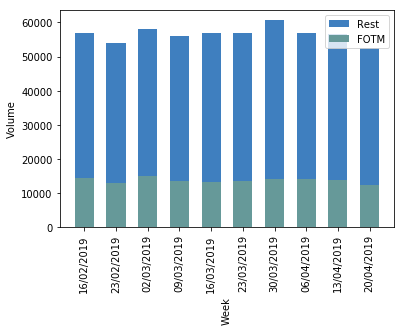

In [3]:
WE = DF['WE']
FOTM = DF['FOTM']
Rest = DF['Difference']
ind = [ WE for WE in WE]
 
plt.bar(ind, Rest, width=0.6, label='Rest', color='#3F7FBF', bottom=FOTM)
plt.bar(ind,FOTM, width=0.6, label='FOTM', color='#669999')
 
plt.xticks(ind, WE,rotation='vertical')
plt.ylabel("Volume")
plt.xlabel("Week", rotation='vertical')
plt.legend(loc="upper right")
plt.show()

### Reading in 400 days of transaction data

In [4]:
DF2= pd.read_csv("Desktop/Decoded Data Sources/Python/AR Project/WS400.csv")
DF2.columns = ['Date','DOW','TID','Category','Product','Quantity','TID_Items','WE']
DF2.head()


,Date,DOW,TID,Category,Product,Quantity,TID_Items,WE
0,20180627,Wednesday,6678928389,Savoury Snacks,877994,1.0,2,30/06/2018
1,20180627,Wednesday,6678990596,Homecare,876797,1.0,4,30/06/2018
2,20180627,Wednesday,6679004119,Food onthe Move,1000411,1.0,3,30/06/2018
3,20180627,Wednesday,6679010755,Concessions,4953645,1.0,7,30/06/2018
4,20180627,Wednesday,6679114561,Food onthe Move,4850989,1.0,9,30/06/2018


In [5]:
DF3= pd.read_csv("Desktop/Decoded Data Sources/Python/AR Project/Product.csv")
DF3.columns=['ARTICLE','Product']
DF3.head()

,ARTICLE,Product
0,CHOCOLATE CONES,2903748
1,DRY OLOROSO,46557
2,*FOF ROAST BEEF & ONION,878342
3,0% GRK STY MIX FRTS 4x140g,4941137
4,50CL PORT DECANTER,224102


In [6]:
baskets = pd.merge(DF2,DF3, on=['Product'], how='inner')
baskets['ARTICLE'].value_counts().rename("Freq")

QUARTER ROTISSERIE              12403
CARRIER BAG SCOT.               12263
HOT PLAIN  RICE                 11276
MINI VEST CARRIER                8873
GREEK STYLE SALAD                8546
CAESAR SALAD                     6768
LATTE-M                          6675
LARGE CARRIER BAG.               6590
DIET COKE CAN.                   6562
REDUCED F61C                     6408
REDUCED F04C                     6388
REDUCED F09A                     6318
Scottish Sparkling  500ml        6152
SKINNY FRIES                     5912
Scottish Still 500ml             5836
*ALL BUTTER CROISSANT .          5724
SWEET POTATO FRIES               5579
REDUCED F15C                     5371
EW SINGLE BANANA                 5318
REDUCED F07C                     5280
SCOTTISH STILL WATER 2 L         5151
*DIET COKE BTL 500ML             5048
REDUCED DEFAULT                  4865
SHREDDED CHICKEN                 4818
AMERICANO-M                      4765
ZERO COKE CAN                    4683
COKE ZERO BT

# Grouping Waterside Baskets

In [7]:
baskets = baskets.groupby(['TID']).ARTICLE.apply(np.array).reset_index()
baskets.head()

,TID,ARTICLE
0,6659832417,"[VZ ADD SOYA MILK, SKINNY AMERICANO, VZ NO MAR..."
1,6659858339,"[VZ ADD SOYA MILK, SKINNY AMERICANO, VZ NO MAR..."
2,6661343544,[MED AMERICANO]
3,6661351932,[MED AMERICANO]
4,6661755765,[MED AMERICANO]


# Sparse Matrix

In [8]:
te = TransactionEncoder()
te_ary = te.fit(baskets['ARTICLE']).transform(baskets['ARTICLE'])
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,CHOCOLATE CONES,0% GRK STY MIX FRTS 4x140g,50CL PORT DECANTER,BERRIES CHERRY FLAKES,BFY COCONUT&LMNGRSS CHCKN,CARIGNAN OLD VINES RED.,CASH FRT NUT BAR,CHOCOLATE TEACAKE MB,CONTINO ESTATE RIOJA,COU SOUR CRM & CHV BAKES,...,YOU MELT MY HEART (NET),YULE LOG SNOW M/BITES,YULETIDE LOG,ZEBRA VIEW SAUVIGNON BLA,ZERO COKE CAN,ZESTY CHICKEN TAGINE WI,balloon bird,dog in bag,grandad class car,heartfelt sym
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[ (frequent_itemsets['length'] == 2)]
frequent_itemsets.head()

,support,itemsets,length


## Seaborn